In [1]:
#import lib
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#define variables
SYMBOL = 'EURUSD=X'
START_DATE = datetime.datetime(2020, 1, 1)
END_DATE = datetime.datetime(2025, 1, 1)
YEARS = (END_DATE - START_DATE).days / 365.25
INTERVAL = '1d'

STARTING_BALANCE = 10000
FAST_MA = 50
SLOW_MA = 200

#download data
data = yf.download(SYMBOL, start=START_DATE, end=END_DATE, interval=INTERVAL, multi_level_index=False)

data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,1.122083,1.122838,1.115947,1.122083,0
2020-01-02,1.122083,1.122712,1.116682,1.121894,0
2020-01-03,1.117144,1.118068,1.112570,1.117081,0
2020-01-06,1.116196,1.120825,1.115810,1.116246,0
2020-01-07,1.119799,1.119946,1.113487,1.119583,0


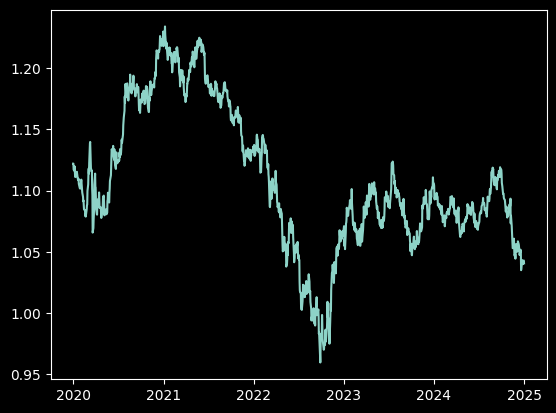

In [3]:
#drop redundant columns
data = data.drop(['High', 'Low', 'Volume'], axis=1)
data.head()

#plot chart
plt.style.use('dark_background')
plt.plot(data.Close)
plt.show()

In [4]:
#calculate daily return
data['Return'] = data.Close / data.Close.shift(1)
data['Bench_Bal'] = STARTING_BALANCE * data.Return.cumprod()
data.tail()

#calculate drawdown
data['Bench_Peak'] = data.Bench_Bal.cummax()
data['Bench_DD'] = data.Bench_Bal - data.Bench_Peak
bench_dd = round((((data.Bench_DD / data.Bench_Peak).min()) * 100), 2)

In [5]:
#calculate moving averages
data['Fast_MA'] = data.Close.rolling(window = FAST_MA).mean()
data['Slow_MA'] = data.Close.rolling(window = SLOW_MA).mean()

data.tail()

,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Date,,,,,,,,
2024-12-25,1.040258,1.040258,0.999688,9270.778631,10998.39568,-1727.617049,1.062649,1.081909
2024-12-26,1.039955,1.039955,0.999709,9268.080152,10998.39568,-1730.315528,1.061723,1.081640
2024-12-27,1.042318,1.042318,1.002272,9289.138910,10998.39568,-1709.256770,1.060910,1.081421
2024-12-30,1.042938,1.042938,1.000594,9294.661230,10998.39568,-1703.734450,1.060032,1.081232
2024-12-31,1.040615,1.040615,0.997773,9273.962624,10998.39568,-1724.433057,1.059208,1.081016


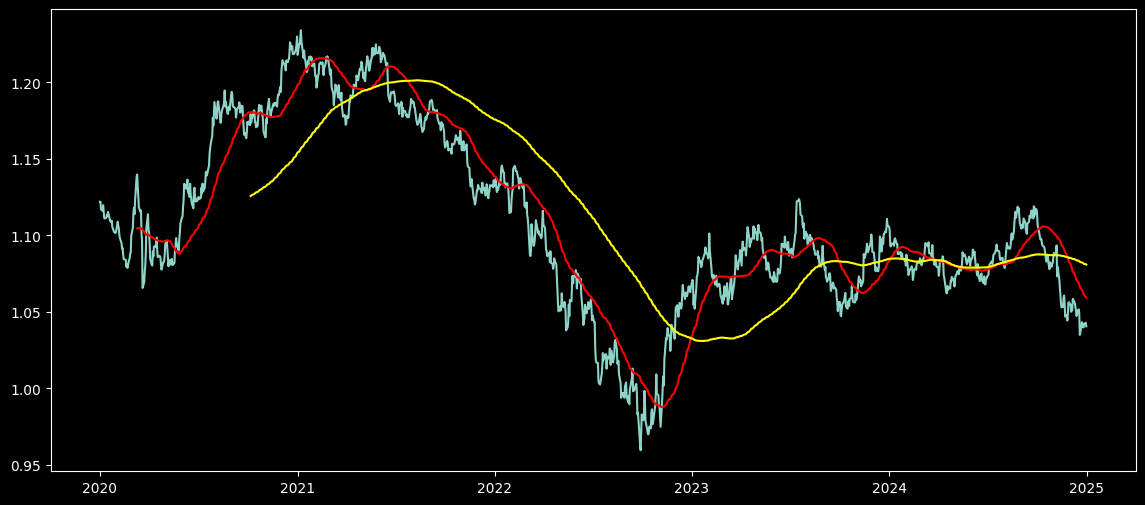

In [6]:
#draw graph
plt.figure(figsize=(14, 6))
plt.plot(data.Close)
plt.plot(data.Fast_MA, color="red")
plt.plot(data.Slow_MA, color="yellow")

plt.show()

In [7]:
#define entries
data['Long'] = data.Fast_MA > data.Slow_MA

data.tail()

,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Date,,,,,,,,,
2024-12-25,1.040258,1.040258,0.999688,9270.778631,10998.39568,-1727.617049,1.062649,1.081909,False
2024-12-26,1.039955,1.039955,0.999709,9268.080152,10998.39568,-1730.315528,1.061723,1.081640,False
2024-12-27,1.042318,1.042318,1.002272,9289.138910,10998.39568,-1709.256770,1.060910,1.081421,False
2024-12-30,1.042938,1.042938,1.000594,9294.661230,10998.39568,-1703.734450,1.060032,1.081232,False
2024-12-31,1.040615,1.040615,0.997773,9273.962624,10998.39568,-1724.433057,1.059208,1.081016,False


In [8]:
#calculate system return
data['Sys_Ret'] = np.where(data.Long.shift(1) == True, data.Return, 1)

data.tail()

,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret
Date,,,,,,,,,,
2024-12-25,1.040258,1.040258,0.999688,9270.778631,10998.39568,-1727.617049,1.062649,1.081909,False,1.0
2024-12-26,1.039955,1.039955,0.999709,9268.080152,10998.39568,-1730.315528,1.061723,1.081640,False,1.0
2024-12-27,1.042318,1.042318,1.002272,9289.138910,10998.39568,-1709.256770,1.060910,1.081421,False,1.0
2024-12-30,1.042938,1.042938,1.000594,9294.661230,10998.39568,-1703.734450,1.060032,1.081232,False,1.0
2024-12-31,1.040615,1.040615,0.997773,9273.962624,10998.39568,-1724.433057,1.059208,1.081016,False,1.0


In [9]:
#calculate system balance
data['Sys_Bal'] = STARTING_BALANCE * data.Sys_Ret.cumprod()

data.tail()

,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,,,,
2024-12-25,1.040258,1.040258,0.999688,9270.778631,10998.39568,-1727.617049,1.062649,1.081909,False,1.0,9101.090925
2024-12-26,1.039955,1.039955,0.999709,9268.080152,10998.39568,-1730.315528,1.061723,1.081640,False,1.0,9101.090925
2024-12-27,1.042318,1.042318,1.002272,9289.138910,10998.39568,-1709.256770,1.060910,1.081421,False,1.0,9101.090925
2024-12-30,1.042938,1.042938,1.000594,9294.661230,10998.39568,-1703.734450,1.060032,1.081232,False,1.0,9101.090925
2024-12-31,1.040615,1.040615,0.997773,9273.962624,10998.39568,-1724.433057,1.059208,1.081016,False,1.0,9101.090925


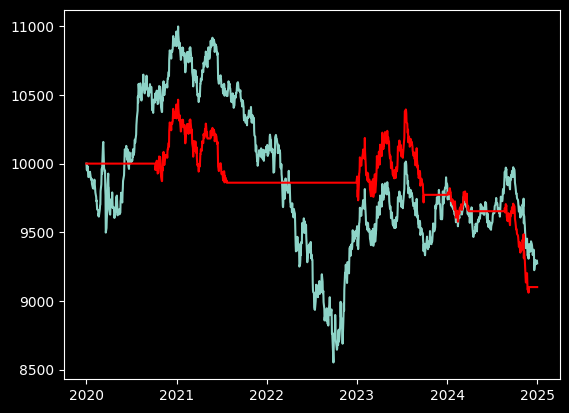

In [10]:
plt.plot(data.Bench_Bal)
plt.plot(data.Sys_Bal, color="red")

plt.show()

In [11]:
#calculate drawdown
data['Sys_Peak'] = data.Sys_Bal.cummax()

data['Sys_DD'] = data.Sys_Bal - data.Sys_Peak

sys_dd = round((((data.Sys_DD / data.Sys_Peak).min()) * 100), 2)

print(sys_dd)

-13.42


In [12]:
#calculate metrics
bench_return = round(((data.Bench_Bal.iloc[-1]/data.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((data.Bench_Bal.iloc[-1]/data.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
sys_return = round(((data.Sys_Bal.iloc[-1]/data.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((data.Sys_Bal.iloc[-1]/data.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((data.Long.sum() / data.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: -7.26%
Benchmark CAGR: -1.5
Benchmark DD: -22.24%

System Total return: -8.99%
System CAGR: -1.87
System DD: -13.42%
System Time in the Market: 40.38%
